# Importing dependencies

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Loading the Data Set

In [149]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_health_data.csv')

In [150]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,stroke,avg_glucose_level_transformed
0,Male,67.0,0,1,Yes,Private,Urban,36.6,formerly smoked,1,5.137899
1,Female,61.0,0,0,Yes,Self-employed,Rural,28.1,never smoked,1,5.137899
2,Male,80.0,0,1,Yes,Private,Rural,32.5,never smoked,1,4.672081
3,Female,49.0,0,0,Yes,Private,Urban,34.4,smokes,1,5.137899
4,Female,79.0,1,0,Yes,Self-employed,Rural,24.0,never smoked,1,5.137899


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         5109 non-null   object 
 1   age                            5109 non-null   float64
 2   hypertension                   5109 non-null   int64  
 3   heart_disease                  5109 non-null   int64  
 4   ever_married                   5109 non-null   object 
 5   work_type                      5109 non-null   object 
 6   Residence_type                 5109 non-null   object 
 7   bmi                            5109 non-null   float64
 8   smoking_status                 5109 non-null   object 
 9   stroke                         5109 non-null   int64  
 10  avg_glucose_level_transformed  5109 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 439.2+ KB


# Converting categorical variables to numerical

In [152]:
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=False)  # One-hot encoding

In [153]:
df.head()

,age,hypertension,heart_disease,bmi,stroke,avg_glucose_level_transformed,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,36.6,1,5.137899,False,True,False,True,False,False,True,False,False,False,True,False,True,False,False
1,61.0,0,0,28.1,1,5.137899,True,False,False,True,False,False,False,True,False,True,False,False,False,True,False
2,80.0,0,1,32.5,1,4.672081,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False
3,49.0,0,0,34.4,1,5.137899,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True
4,79.0,1,0,24.0,1,5.137899,True,False,False,True,False,False,False,True,False,True,False,False,False,True,False


# Checking Corelation

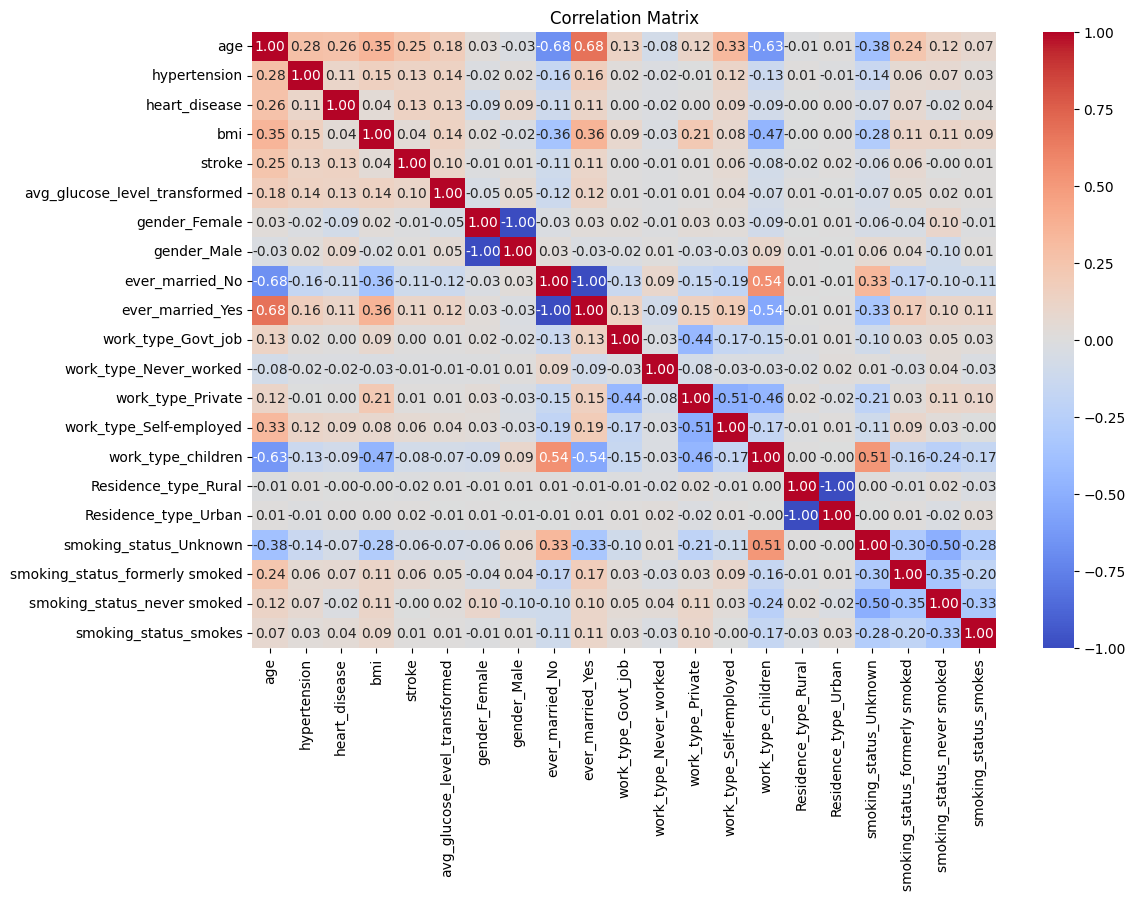

In [154]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Ploting the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Preparing data to train

In [155]:
#Defining features and Target
X = df.drop(columns=['stroke'])  # Features
y = df['stroke']  # Target variable

In [156]:
# Normalize numerical features
scaler = StandardScaler()
X[['age', 'bmi', 'avg_glucose_level_transformed']] = scaler.fit_transform(X[['age', 'bmi', 'avg_glucose_level_transformed']])


In [157]:
# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [158]:
X_train.head()

,age,hypertension,heart_disease,bmi,avg_glucose_level_transformed,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
845,0.210956,0,0,0.619124,-1.067388,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False
3744,-0.629329,0,0,-1.052150,-0.432492,True,False,True,False,False,False,True,False,False,False,True,False,False,True,False
4183,-0.363976,0,0,-0.813397,0.703188,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False
3409,-0.231299,0,0,0.562947,0.397047,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False
284,-1.292712,0,0,0.408459,-0.504570,False,True,True,False,True,False,False,False,False,False,True,True,False,False,False


In [159]:
X_test.head()

,age,hypertension,heart_disease,bmi,avg_glucose_level_transformed,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3666,-0.673555,1,0,1.082587,-0.452981,True,False,False,True,True,False,False,False,False,True,False,False,False,True,False
2217,-1.779193,0,0,-1.290904,-0.098957,True,False,True,False,False,False,False,False,True,False,True,True,False,False,False
374,0.432084,0,0,0.324193,-1.300372,True,False,False,True,True,False,False,False,False,True,False,False,False,False,True
2392,-0.363976,0,0,1.981423,-1.066921,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False
299,0.653212,0,0,0.057351,-0.064326,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False


# Training Data

## 1. Logistic Regression

In [160]:
# Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict and Evaluate
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.9510763209393346
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 2.Random Forest Classifier

In [161]:
# Train Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and Evaluate
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9500978473581213
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.33      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.64      0.51      0.51      1022
weighted avg       0.92      0.95      0.93      1022



# Checking Feature importance

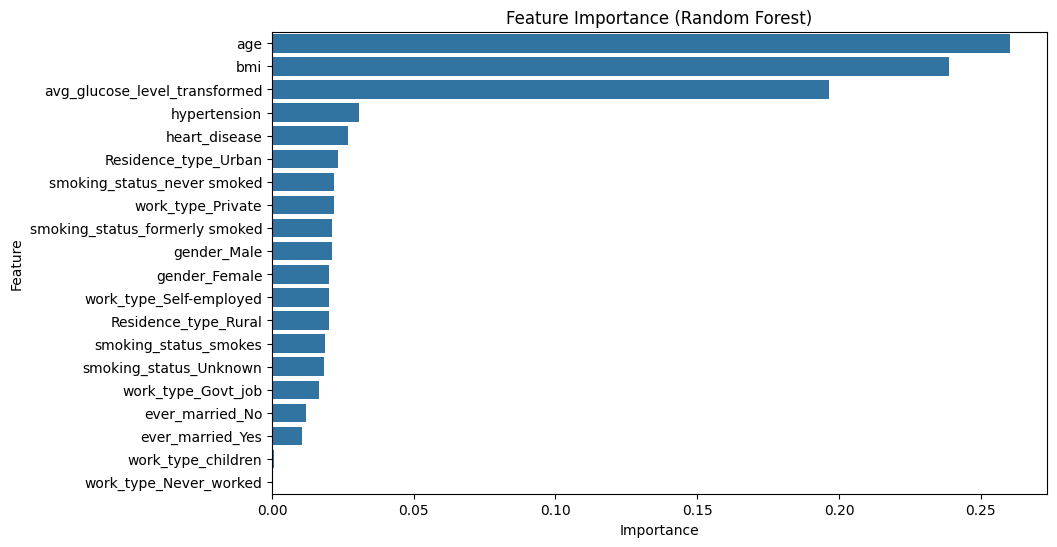

In [162]:
# Get feature importance
feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf)
plt.title("Feature Importance (Random Forest)")
plt.show()


## 03. XGBoost Classifier

In [163]:
# Train XGBoost Model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Predict and Evaluate
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9383561643835616
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       972
           1       0.16      0.06      0.09        50

    accuracy                           0.94      1022
   macro avg       0.56      0.52      0.53      1022
weighted avg       0.91      0.94      0.92      1022



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:33:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## Checking feature importance

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:33:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


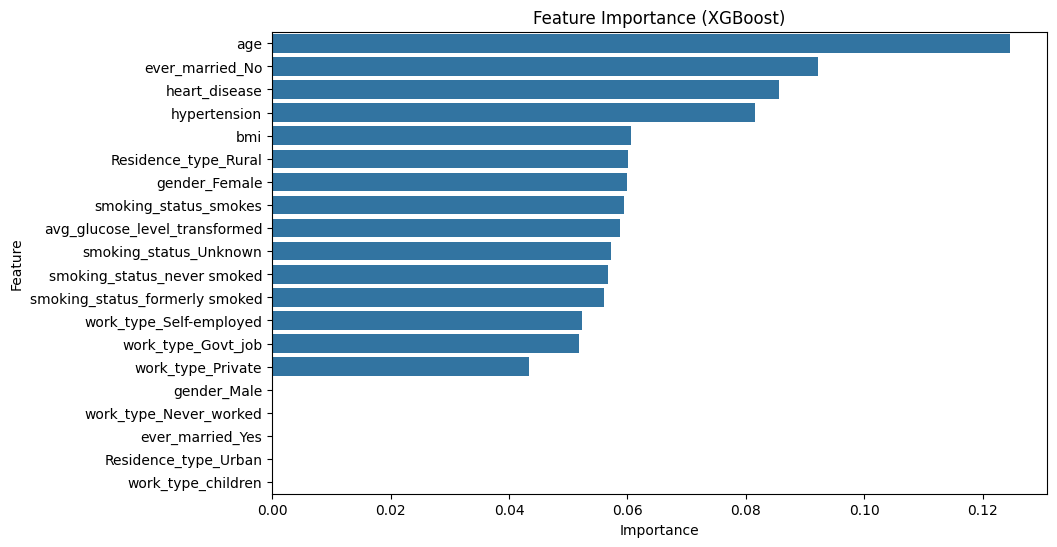

In [164]:
from xgboost import XGBClassifier

# Train XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Get feature importance
feature_importance_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': xgb.feature_importances_})
feature_importance_xgb = feature_importance_xgb.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_xgb)
plt.title("Feature Importance (XGBoost)")
plt.show()


## Checking imbalances in the dataset.

In [165]:
# Count the number of instances in each class
class_counts = df['stroke'].value_counts()
print(class_counts)

# Percentage of each class
print("Class Distribution (%):")
print(df['stroke'].value_counts(normalize=True) * 100)

stroke
0    4860
1     249
Name: count, dtype: int64
Class Distribution (%):
stroke
0    95.126248
1     4.873752
Name: proportion, dtype: float64


<ipython-input-166-d5a23a0d57bf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=class_counts.index, y=class_counts.values, palette='coolwarm')


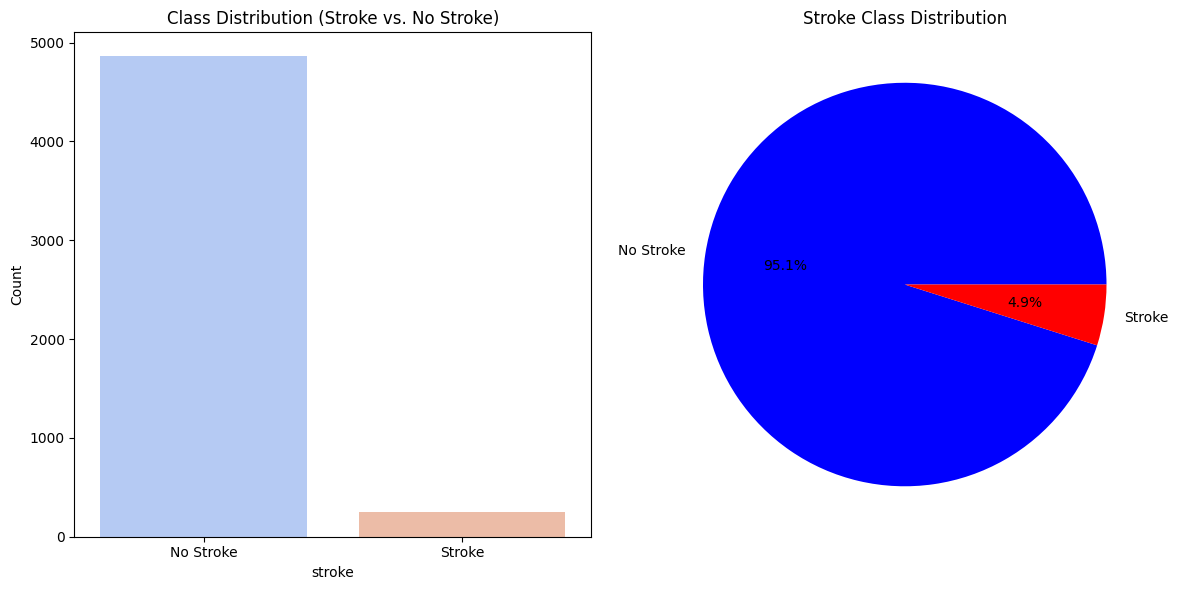

In [166]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar Plot
sns.barplot(ax=axes[0], x=class_counts.index, y=class_counts.values, palette='coolwarm')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["No Stroke", "Stroke"])
axes[0].set_ylabel("Count")
axes[0].set_title("Class Distribution (Stroke vs. No Stroke)")

# Pie Chart
axes[1].pie(class_counts, labels=["No Stroke", "Stroke"], autopct="%1.1f%%", colors=['blue', 'red'])
axes[1].set_title("Stroke Class Distribution")


plt.tight_layout()
plt.show()


### Since our dataset is extreamely imbalanced, let's perform oversampling and undersampling to determine which approach gives us the better accuracy.

# 01.Oversampling

In [167]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Define SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to balance the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
print(f"Original class distribution: {Counter(y)}")
print(f"Resampled class distribution: {Counter(y_resampled)}")


Original class distribution: Counter({0: 4860, 1: 249})
Resampled class distribution: Counter({1: 4860, 0: 4860})


## Train the data set again to see new accuracy

In [168]:
# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


### 01.Logistic Regression

In [169]:
# Train Logistic Regression Model
log_reg_oversampled = LogisticRegression()
log_reg_oversampled.fit(X_train, y_train)

# Predict and Evaluate
y_pred_log_OS = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_OS))
print(classification_report(y_test, y_pred_log_OS))


Logistic Regression Accuracy: 0.5020576131687243
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       976
           1       0.00      0.00      0.00       968

    accuracy                           0.50      1944
   macro avg       0.25      0.50      0.33      1944
weighted avg       0.25      0.50      0.34      1944



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 02.Random Forest

In [170]:
# Train Random Forest Model
rf_Oversampled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_Oversampled.fit(X_train, y_train)

# Predict and Evaluate
y_pred_rf_oversampled = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_oversampled))
print(classification_report(y_test, y_pred_rf_oversampled))

Random Forest Accuracy: 0.5838477366255144
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       976
           1       1.00      0.16      0.28       968

    accuracy                           0.58      1944
   macro avg       0.77      0.58      0.49      1944
weighted avg       0.77      0.58      0.50      1944



### 03.XGBoost Classifier

In [172]:
# Train XGBoost Model
xgb_oversampled = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_oversampled.fit(X_train, y_train)

# Predict and Evaluate
y_pred_xgb_oversampled = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb_oversampled))
print(classification_report(y_test, y_pred_xgb_oversampled))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:36:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.5997942386831275
              precision    recall  f1-score   support

           0       0.56      1.00      0.71       976
           1       0.98      0.20      0.33       968

    accuracy                           0.60      1944
   macro avg       0.77      0.60      0.52      1944
weighted avg       0.77      0.60      0.52      1944



# 02.Under Sampling

In [173]:
from imblearn.under_sampling import RandomUnderSampler

# Define undersampling
undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Apply undersampling
X_resampled, y_resampled = undersample.fit_resample(X, y)

# Check new class distribution
print(f"Original class distribution: {Counter(y)}")
print(f"Resampled class distribution: {Counter(y_resampled)}")


Original class distribution: Counter({0: 4860, 1: 249})
Resampled class distribution: Counter({0: 249, 1: 249})


## Train the data set again to see new accuracy

In [174]:
# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


## 01. Logistic regression

In [175]:
# Train Logistic Regression Model
log_reg_undersampled = LogisticRegression()
log_reg_undersampled.fit(X_train, y_train)

# Predict and Evaluate
y_pred_log_undersampled = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_undersampled))
print(classification_report(y_test, y_pred_log_undersampled))


Logistic Regression Accuracy: 0.51
              precision    recall  f1-score   support

           0       0.51      1.00      0.68        51
           1       0.00      0.00      0.00        49

    accuracy                           0.51       100
   macro avg       0.26      0.50      0.34       100
weighted avg       0.26      0.51      0.34       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 02. Random Forest

In [176]:
# Train Random Forest Model
rf_undersampled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_undersampled.fit(X_train, y_train)

# Predict and Evaluate
y_pred_rf_undersampled = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_undersampled))
print(classification_report(y_test, y_pred_rf_undersampled))

Random Forest Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        51
           1       1.00      0.82      0.90        49

    accuracy                           0.91       100
   macro avg       0.93      0.91      0.91       100
weighted avg       0.92      0.91      0.91       100



## 03. XGBoost classifier

In [178]:
# Train XGBoost Model
xgb_oversampled = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_oversampled.fit(X_train, y_train)

# Predict and Evaluate
y_pred_xgb_oversampled = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb_oversampled))
print(classification_report(y_test, y_pred_xgb_oversampled))

XGBoost Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        51
           1       1.00      0.80      0.89        49

    accuracy                           0.90       100
   macro avg       0.92      0.90      0.90       100
weighted avg       0.92      0.90      0.90       100



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:42:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
